# Task 2 Solution

### Q. To predict the optimum number of cluster of 'Iris' Dataset and represent it visually

## Solution By Vishnu Derkar

In [1]:
# Import all the relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

#Load the iris dataset in pandas dataframe
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


Here we are able to see the features of columns and we have to cluster them but lets first visualize them.

## Looking for nan Values

In [2]:
iris_df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

## Data Visualization

Here we explore the data to see if we could find any clusters by plotting the data.

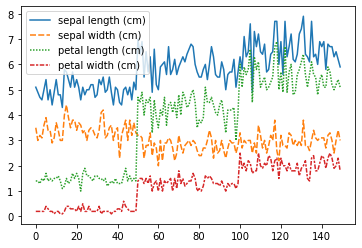

In [3]:
sns.lineplot(data=iris_df)

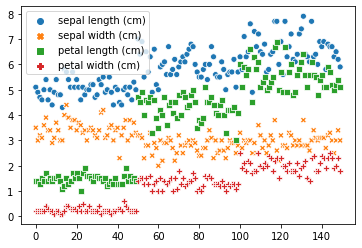

In [4]:
sns.scatterplot(data=iris_df)

In [5]:
corr = iris_df.corr()

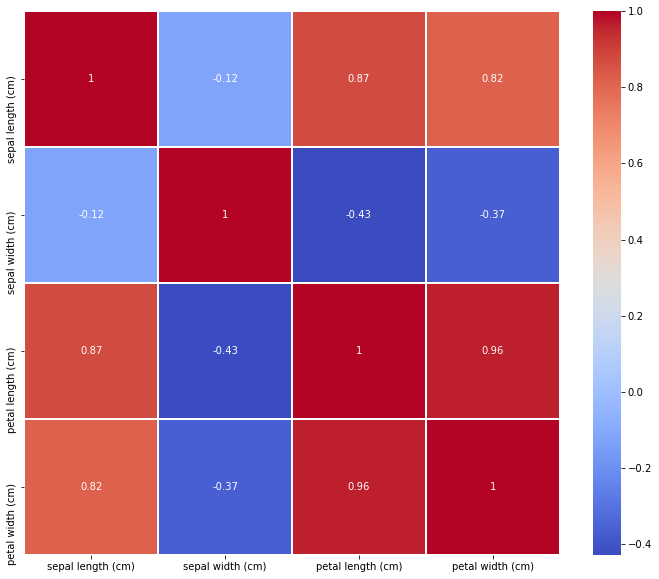

In [6]:
fig=plt.figure(figsize=(12,10))
sns.heatmap(corr, linewidths=1,annot=True,square=False,cmap="coolwarm")

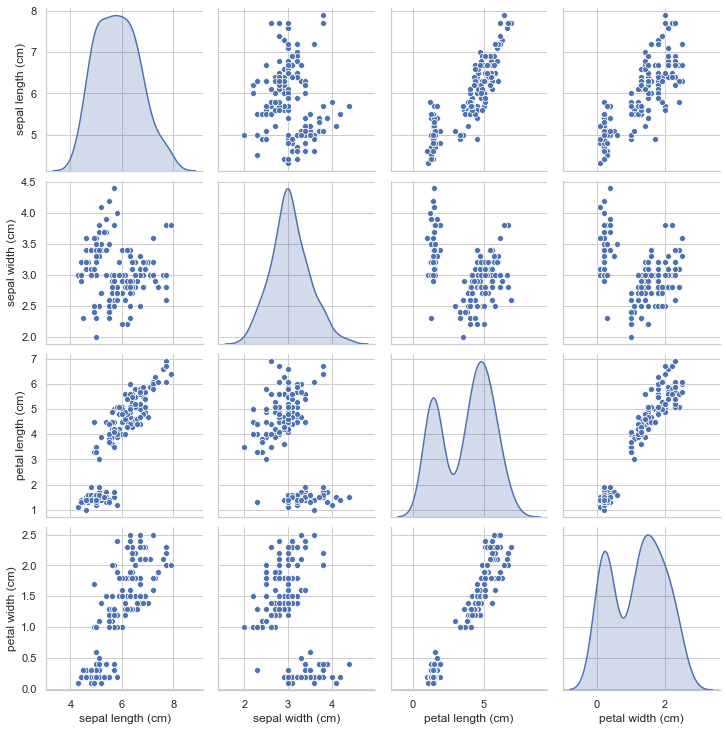

In [19]:
sns.pairplot(data= iris_df, diag_kind='kde')

#### Although we have plotted the data we cannot identify proper clusters so we will now use the Unsupervised KMeans clustering algorithm. KMeans will aggregate the Data points together based on certain similarity.  

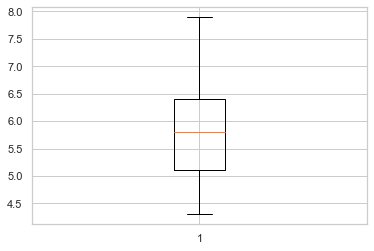

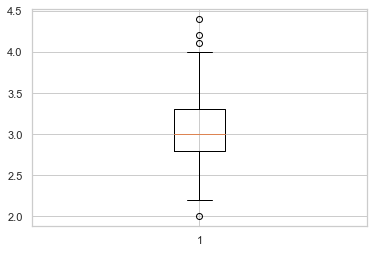

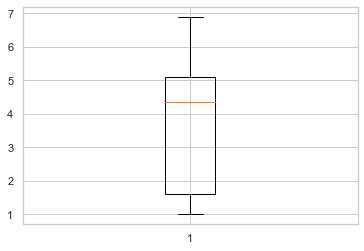

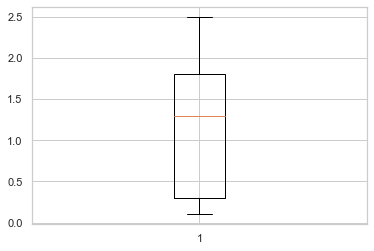

In [21]:
for i in iris.feature_names:
    plt.boxplot(iris_df[i])
    plt.show()

## Finding the optimum number of cluster in the data

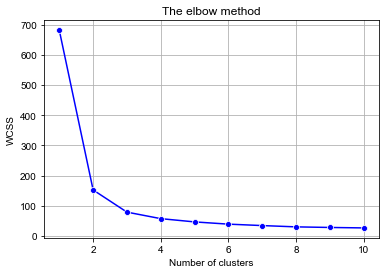

In [8]:
# To find the optimum number of cluster in the data, we have to use the elbow method

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, random_state = 0)
    kmeans.fit(iris_df)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
sns.lineplot(range(1, 11), wcss, marker='o',color='blue')
sns.set(style='whitegrid')
plt.grid(True)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

From the graph we can conclude that the point where number of cluster is 3 forms an elbow and after that the curve flattens. This is when the within cluster sum of squares (WCSS) doesn't decrease significantly with every iteration.

So we choose K=3

In [9]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, random_state = 0)
y_kmeans = kmeans.fit_predict(iris_df)

x = iris_df.iloc[:, [0, 1, 2, 3]].values

## Clustering Visualization

### Based on Sepal Length and Sepal Width

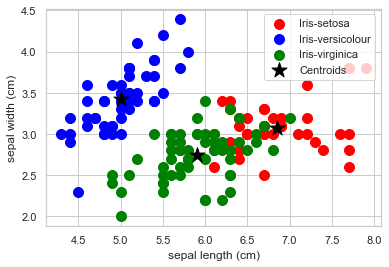

In [16]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 250, c = 'black', label = 'Centroids', marker='*')

plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.legend()
plt.show()

### Based on Petal Length and Petal Width

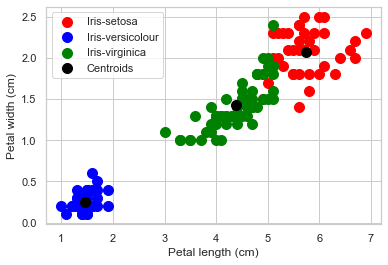

In [11]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0,2], x[y_kmeans == 0,3], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,2], x[y_kmeans == 1,3], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,2], x[y_kmeans == 2,3], s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:,3], 
            s = 100, c = 'black', label = 'Centroids')

plt.xlabel('Petal length (cm)')
plt.ylabel('Petal width (cm)')
plt.legend()
plt.show()

## These are the codes from sklearns website for Iris Dataset

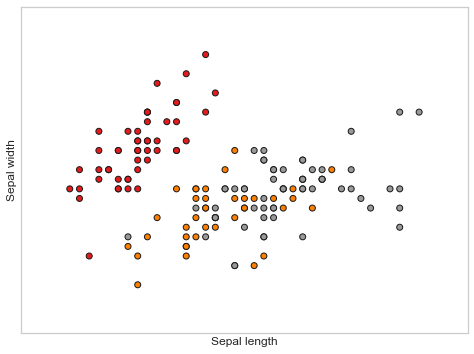

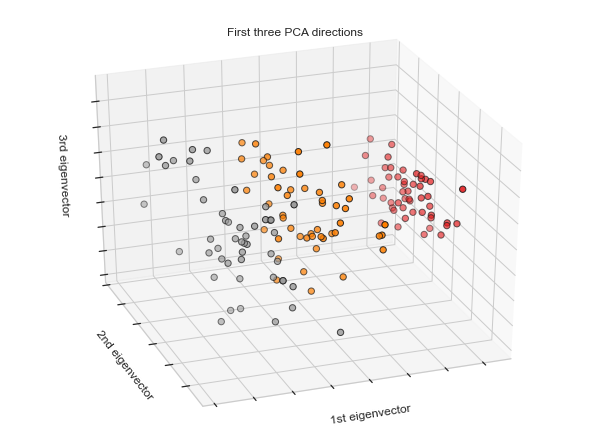

In [12]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()